In [2]:
from fastai.vision import*


In [4]:
folder='apple'
file='apple.txt'

In [5]:
path=Path('data/fruits')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [10]:
download_images(path/file,dest,max_pics=200)

In [20]:
fruits=['orange','jackfruit','nashpati','banana','lychee','apple','mango']

In [21]:
for i in fruits:
    folder=i
    file=i+'.txt'
    path=Path('data/fruits')
    dest=path/folder
    dest.mkdir(parents=True,exist_ok=True)
    download_images(path/file,dest,max_pics=200)

In [22]:
for c in fruits:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

orange


jackfruit


nashpati


banana


lychee


apple


mango


In [6]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,bs=16,num_workers=4).normalize(imagenet_stats)

C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [7]:
data.classes

['apple', 'banana', 'jackfruit', 'lychee', 'mango', 'nashpati', 'orange']

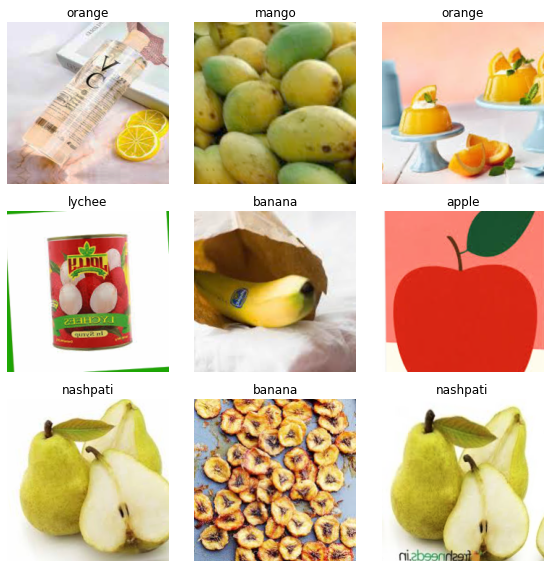

In [8]:
data.show_batch(rows=3,figsize=(8,8))

In [9]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393538,0.572503,0.167857,01:14
1,1.014929,0.605764,0.185714,01:10
2,0.680760,0.454331,0.128571,01:10
3,0.549795,0.405082,0.121429,01:11


In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


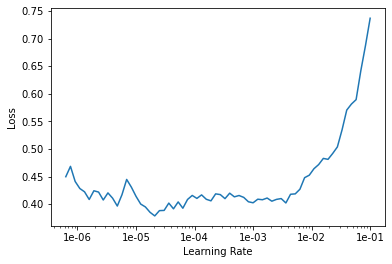

In [12]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4,max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.454480,0.447944,0.139286,01:08
1,0.561635,0.407051,0.125000,01:08
2,0.540710,0.445932,0.128571,01:08
3,0.398674,0.417040,0.139286,01:08


In [15]:
learn.save('stage-2')

In [16]:
interp=ClassificationInterpretation.from_learner(learn)

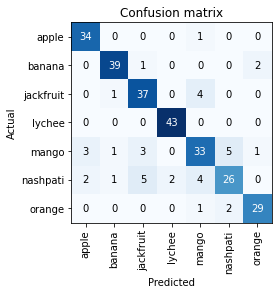

In [17]:
interp.plot_confusion_matrix()

In [19]:
learn.export()